# Read & interpret dataset

Loading some datasets <p>
Confirming and interpreting it <p>
Preprocessing missing values and outliers on the datasets

In [37]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt #描画ライブラリ
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math
import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
from numpy import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
all_data = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/all_data.csv', sep=',', header=0)
all_data.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,System_price(Yen/kWh),Price_Hokkaido(Yen/kWh),Price_Tokyo(Yen/kWh),Price_Kansai(Yen/kWh),BidExceed_diff,HourlyDemand_Hokkaido,HourlyDemand_Tokyo,HourlyDemand_Kansai,HourlyDemand_Okinawa,Wind_TOH,Geothermal_TOH,PumpedStorage_TOH,Interconnection_TOH,Geothermal_HOK,Wind_HOK,Interconnection_HOK,Wind_TKO,Interconnection_TKO,Wind_CHB,Interconnection_CHB,Wind_HKU,PumpedStorage_HKU,Interconnection_HKU,Nuclear_KAN,Wind_KAN,Interconnection_KAN,Thermal_CHG,Water_CHG,Wind_CHG,Interconnection_CHG,Nuclear_SHI,Wind_SHI,Interconnection_SHI,Nuclear_KYU,Geothermal_KYU,PV_KYU,PVCurtailment_KYU,Wind_KYU,WindCurtailment_KYU,Interconnection_KYU,Thermal_OKI,Biomass_OKI,Wind_OKI,Allarea_TotalDemand,Allarea_Water,Allarea_Thermal,Allarea_Geothermal,Allarea_Biomass,Allarea_PumpedStorage,Allarea_Interconnection,Water_Ratio,Thermal_Ratio,Geothermal_Ratio,Planned_Min_flag,Planned_Max_flag,ForecastPV_Hokkaido,Forecast_PV_Chubu,Forecast_Wind_Chubu,ForecastPV_Hokuriku,ForecastWind_Kansai,Temp_Tokyo,SunLight(Time)_Tokyo,WindSpeed(m/s)_Tokyo,WindDirection_Tokyo,SunLight(MJ/㎡)_Tokyo,Gas_Price,Oil_Price,month,dayofweek,holiday
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.70,1,00:00:00,6.61,8.66,6.69,6.69,0,3166.0,25547.0,12917.964,644.70,46.0,116.0,0.0,-2200.0,13.0,40.0,42.0,2.0,201.0,21.0,-331.0,12.0,0.0,-148.0,0.0,41.0,1625.0,0.0,0.0,0.0,0.0,0.0,5.0,-71.0,1782.0,145.0,0.0,0.0,44.0,0.0,-1300.0,643.0,2.0,2.0,50178.0,4897.0,45004.0,274.0,82.0,110.0,-2182.0,0.100,0.9,0.01,0.0,0.0,0.0,0.0,3274.0,0.0,17327.0,13.30,0.0,1.40,11.0,0.0,1.88,37.73,4,4,0
1,2016-04-01,2,7.45,7.45,7.45,7.45,7.45,0.75,0,00:30:00,6.34,8.66,6.34,6.34,0,3224.0,24940.5,12876.666,635.30,48.0,116.0,0.0,-2189.0,13.0,37.0,51.5,2.0,193.5,24.5,-403.5,10.5,0.0,-79.0,0.0,32.5,1701.5,0.0,0.0,0.0,0.0,0.0,5.0,-71.0,1782.0,145.0,0.0,0.0,39.5,0.0,-1298.0,634.0,2.0,2.5,50323.5,4821.0,45204.0,274.0,81.5,55.0,-2094.0,0.095,0.9,0.01,0.0,0.0,0.0,0.0,3026.0,0.0,17327.0,13.55,0.0,2.00,13.0,0.0,1.88,37.73,4,4,0
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.80,1,01:00:00,6.34,7.20,6.34,6.34,0,3282.0,24334.0,12835.368,625.90,50.0,116.0,0.0,-2178.0,13.0,34.0,61.0,2.0,186.0,28.0,-476.0,9.0,0.0,-10.0,0.0,24.0,1778.0,0.0,0.0,0.0,0.0,0.0,5.0,-71.0,1782.0,145.0,0.0,0.0,35.0,0.0,-1296.0,625.0,2.0,3.0,50469.0,4745.0,45404.0,274.0,81.0,0.0,-2006.0,0.090,0.9,0.01,0.0,0.0,0.0,0.0,3437.0,0.0,17327.0,13.80,0.0,2.60,15.0,0.0,1.88,37.73,4,4,0
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.80,1,01:30:00,6.25,7.10,6.03,6.03,0,3334.5,24134.0,13093.248,632.75,49.0,115.5,0.0,-2174.5,13.0,31.5,60.0,2.0,183.0,35.0,-485.5,8.5,0.0,-38.5,0.0,25.5,1811.0,0.0,0.0,0.0,0.0,0.0,5.0,-69.0,1781.5,145.0,0.0,0.0,39.0,0.0,-1360.0,632.5,2.0,2.5,51340.0,4868.5,46207.0,273.5,80.0,6.0,-2073.5,0.095,0.9,0.01,0.0,0.0,0.0,0.0,4297.0,0.0,17327.0,13.40,0.0,2.85,15.0,0.0,1.88,37.73,4,4,0
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.80,1,02:00:00,6.57,7.10,6.57,6.57,0,3387.0,23934.0,13351.128,639.60,48.0,115.0,0.0,-2171.0,13.0,29.0,59.0,2.0,180.0,42.0,-495.0,8.0,0.0,-67.0,0.0,27.0,1844.0,0.0,0.0,0.0,0.0,0.0,5.0,-67.0,1781.0,145.0,0.0,0.0,43.0,0.0,-1424.0,640.0,2.0,2.0,52211.0,4992.0,47010.0,273.0,79.0,12.0,-2141.0,0.100,0.9,0.01,1.0,0.0,0.0,0.0,5507.0,0.0,17327.0,13.00,0.0,3.10,15.0,0.0,1.88,37.73,4,4,0


# Feature Engineering

## Moving average/VWAP

In [7]:
# Moving average for System price (Do not need lag) 1month, 3month, 1year
all_data["Spot_MA25d"] = all_data["System_price(Yen/kWh)"].rolling(1200).mean().round(2)
all_data["Spot_MA75d"] = all_data["System_price(Yen/kWh)"].rolling(3600).mean().round(2)
all_data["Spot_MA200d"] = all_data["System_price(Yen/kWh)"].rolling(9600).mean().round(2)

In [9]:
# Adjust unit from MWh to kWh to make VWAP column
all_data['Volume_kWh'] = (all_data['Volume(MWh/h)']/2)*1000
all_data['Cum_Vol'] = all_data['Volume_kWh'].cumsum()
all_data['Cum_Vol_Price'] = (all_data['Volume_kWh'] * all_data['Average'] ).cumsum()
all_data['VWAP'] = all_data['Cum_Vol_Price'] / all_data['Cum_Vol']
all_data = all_data.drop(["Volume_kWh", "Cum_Vol", "Cum_Vol_Price"], axis=1)
all_data = all_data.fillna(0)
all_data.isnull().sum()

Date                       0
HH                         0
Open                       0
High                       0
Low                        0
Close                      0
Average                    0
Volume(MWh/h)              0
Volume(Tick count)         0
Time                       0
System_price(Yen/kWh)      0
Price_Hokkaido(Yen/kWh)    0
Price_Tokyo(Yen/kWh)       0
Price_Kansai(Yen/kWh)      0
BidExceed_diff             0
HourlyDemand_Hokkaido      0
HourlyDemand_Tokyo         0
HourlyDemand_Kansai        0
HourlyDemand_Okinawa       0
Wind_TOH                   0
Geothermal_TOH             0
PumpedStorage_TOH          0
Interconnection_TOH        0
Geothermal_HOK             0
Wind_HOK                   0
Interconnection_HOK        0
Wind_TKO                   0
Interconnection_TKO        0
Wind_CHB                   0
Interconnection_CHB        0
Wind_HKU                   0
PumpedStorage_HKU          0
Interconnection_HKU        0
Nuclear_KAN                0
Wind_KAN      

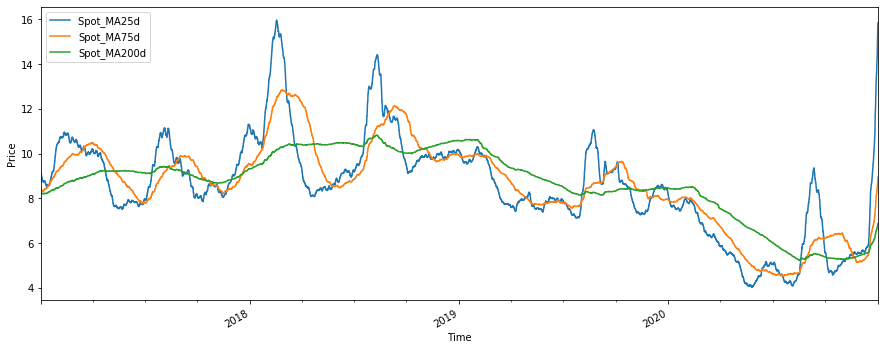

In [10]:
# plot the moving average
fig, ax = plt.subplots(1, figsize=(15, 6))

graph = all_data.copy()
graph["DateTime"] = pd.to_datetime(graph["Date"].astype(str) + " " + graph["Time"].astype(str))

# Set index
graph = graph.set_index("DateTime")
start = "2017-01-01 00:00:00"
end = "2020-12-31 23:30:00"

# Plot Close 
graph.Spot_MA25d [graph.index > start].plot(ax=ax, label="Spot_MA25d ")
graph.Spot_MA75d[graph.index > start].plot(ax=ax, label="Spot_MA75d")
graph.Spot_MA200d[graph.index > start].plot(ax=ax, label="Spot_MA200d")

# x-axis
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Price")
plt.legend(loc="upper left");

## Lag-features (Avoiding data leakage)

In [11]:
# Check the remaining memory on PC
import gc
gc.collect()

42

In [12]:
# This is for generating lag
def generate_lag(train, lag_sizes, cols, lag_sizes_type):

    lag_sizes = np.array(lag_sizes)
    if lag_sizes_type == "HH":
        lag_sizes_adj = lag_sizes * 1 # nothing changes
    elif lag_sizes_type == "Hours":
        lag_sizes_adj = lag_sizes * 2
    elif lag_sizes_type == "Day":
        lag_sizes_adj = lag_sizes * 48

    for ix, lag_sizes_adj_ in enumerate(lag_sizes_adj):
        shifted_df = all_data[cols].shift(lag_sizes_adj_)
        shifted_df.columns = [f"{col_name}_lag_{lag_sizes[ix]}_{lag_sizes_type}" for col_name in shifted_df.columns]
        if ix == 0:
            shifted_df_return = shifted_df
        else:
            shifted_df_return = shifted_df_return.merge(shifted_df, how="left", left_index=True, right_index=True)
    return shifted_df_return

- Generage lagged features for spot market

In [14]:
# Pick up columns that are related to spot market
lag_columns = all_data[['System_price(Yen/kWh)',
       'Price_Hokkaido(Yen/kWh)', 'Price_Tokyo(Yen/kWh)', 'Price_Kansai(Yen/kWh)', 
       'BidExceed_diff','Spot_MA25d', 'Spot_MA75d', 'Spot_MA200d', 'VWAP']].columns

# Generate lag features and drop original columns
# all_data_lagged_HH = generate_lag(all_data, [49, 97], lag_columns, "HH")
# all_data_lagged_Hour = generate_lag(all_data, [2], lag_columns, "Hours")
all_data_lagged_Day = generate_lag(all_data, [1, 2], lag_columns, "Day")

# join everything
# all_data_lagged = pd.merge(all_data, all_data_lagged_HH, how="left", left_index=True, right_index=True)
# all_data = pd.merge(all_data, all_data_lagged_Hour, how="left", left_index=True, right_index=True)
all_data_lagged_spot = pd.merge(all_data, all_data_lagged_Day, how="left", left_index=True, right_index=True)

# Drop lag_columns which can be data leakage
all_data_lagged_spot = all_data_lagged_spot.drop(lag_columns, axis=1)

all_data_lagged_spot.columns

Index(['Date', 'HH', 'Open', 'High', 'Low', 'Close', 'Average',
       'Volume(MWh/h)', 'Volume(Tick count)', 'Time', 'HourlyDemand_Hokkaido',
       'HourlyDemand_Tokyo', 'HourlyDemand_Kansai', 'HourlyDemand_Okinawa',
       'Wind_TOH', 'Geothermal_TOH', 'PumpedStorage_TOH',
       'Interconnection_TOH', 'Geothermal_HOK', 'Wind_HOK',
       'Interconnection_HOK', 'Wind_TKO', 'Interconnection_TKO', 'Wind_CHB',
       'Interconnection_CHB', 'Wind_HKU', 'PumpedStorage_HKU',
       'Interconnection_HKU', 'Nuclear_KAN', 'Wind_KAN', 'Interconnection_KAN',
       'Thermal_CHG', 'Water_CHG', 'Wind_CHG', 'Interconnection_CHG',
       'Nuclear_SHI', 'Wind_SHI', 'Interconnection_SHI', 'Nuclear_KYU',
       'Geothermal_KYU', 'PV_KYU', 'PVCurtailment_KYU', 'Wind_KYU',
       'WindCurtailment_KYU', 'Interconnection_KYU', 'Thermal_OKI',
       'Biomass_OKI', 'Wind_OKI', 'Allarea_TotalDemand', 'Allarea_Water',
       'Allarea_Thermal', 'Allarea_Geothermal', 'Allarea_Biomass',
       'Allarea_PumpedSt

- Prediction point is at 10:00 on a day before the day-ahead market opens
- At least, daylag1 for Spot market informaiton, and daylag2 and 3　for Intra day market information are necessary
- Generage lagged features for any other information except for target and features that are not necessary.<p>
    -->Drop Date, Time, HH, Min/Max_flag, date_block_num, month, dayofweek, holiday and lagged spot features.

In [17]:
# Drop columns that are not necessary to generate lag features
lag_columns = all_data_lagged_spot.columns.drop(['Date', 'Time', 'HH', 'Planned_Min_flag', 'Planned_Max_flag', 'month', 
       'dayofweek', 'holiday', 'System_price(Yen/kWh)_lag_1_Day',
       'Price_Hokkaido(Yen/kWh)_lag_1_Day', 'Price_Tokyo(Yen/kWh)_lag_1_Day',
       'Price_Kansai(Yen/kWh)_lag_1_Day', 'BidExceed_diff_lag_1_Day',
       'Spot_MA25d_lag_1_Day', 'Spot_MA75d_lag_1_Day', 'Spot_MA200d_lag_1_Day',
       'VWAP_lag_1_Day', 'System_price(Yen/kWh)_lag_2_Day', 'Price_Hokkaido(Yen/kWh)_lag_2_Day',
       'Price_Tokyo(Yen/kWh)_lag_2_Day', 'Price_Kansai(Yen/kWh)_lag_2_Day',
       'BidExceed_diff_lag_2_Day', 'Spot_MA25d_lag_2_Day',
       'Spot_MA75d_lag_2_Day', 'Spot_MA200d_lag_2_Day', 'VWAP_lag_2_Day'])

# Generate lag features and drop original columns
all_data_lagged_Day = generate_lag(all_data, [2, 3], lag_columns, "Day")

# Join everything
all_data_lagged = pd.merge(all_data_lagged_spot, all_data_lagged_Day, how="left", left_index=True, right_index=True)

# Drop lag_columns which can be data leakage
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

# Keep both the original and lagged "Close" --> Original: target / Lagged: feature
all_data_lagged["Close"] = all_data["Close"]

all_data_lagged.shape

(83328, 161)

In [18]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum())

Date                                 0
HH                                   0
Time                                 0
Planned_Min_flag                     0
Planned_Max_flag                     0
month                                0
dayofweek                            0
holiday                              0
System_price(Yen/kWh)_lag_1_Day      0
Price_Hokkaido(Yen/kWh)_lag_1_Day    0
Price_Tokyo(Yen/kWh)_lag_1_Day       0
Price_Kansai(Yen/kWh)_lag_1_Day      0
BidExceed_diff_lag_1_Day             0
Spot_MA25d_lag_1_Day                 0
Spot_MA75d_lag_1_Day                 0
Spot_MA200d_lag_1_Day                0
VWAP_lag_1_Day                       0
System_price(Yen/kWh)_lag_2_Day      0
Price_Hokkaido(Yen/kWh)_lag_2_Day    0
Price_Tokyo(Yen/kWh)_lag_2_Day       0
Price_Kansai(Yen/kWh)_lag_2_Day      0
BidExceed_diff_lag_2_Day             0
Spot_MA25d_lag_2_Day                 0
Spot_MA75d_lag_2_Day                 0
Spot_MA200d_lag_2_Day                0
VWAP_lag_2_Day           

In [19]:
all_data_lagged.tail()

,Date,HH,Time,Planned_Min_flag,Planned_Max_flag,month,dayofweek,holiday,System_price(Yen/kWh)_lag_1_Day,Price_Hokkaido(Yen/kWh)_lag_1_Day,Price_Tokyo(Yen/kWh)_lag_1_Day,Price_Kansai(Yen/kWh)_lag_1_Day,BidExceed_diff_lag_1_Day,Spot_MA25d_lag_1_Day,Spot_MA75d_lag_1_Day,Spot_MA200d_lag_1_Day,VWAP_lag_1_Day,System_price(Yen/kWh)_lag_2_Day,Price_Hokkaido(Yen/kWh)_lag_2_Day,Price_Tokyo(Yen/kWh)_lag_2_Day,Price_Kansai(Yen/kWh)_lag_2_Day,BidExceed_diff_lag_2_Day,Spot_MA25d_lag_2_Day,Spot_MA75d_lag_2_Day,Spot_MA200d_lag_2_Day,VWAP_lag_2_Day,Open_lag_2_Day,High_lag_2_Day,Low_lag_2_Day,Close_lag_2_Day,Average_lag_2_Day,Volume(MWh/h)_lag_2_Day,Volume(Tick count)_lag_2_Day,HourlyDemand_Hokkaido_lag_2_Day,HourlyDemand_Tokyo_lag_2_Day,HourlyDemand_Kansai_lag_2_Day,HourlyDemand_Okinawa_lag_2_Day,Wind_TOH_lag_2_Day,Geothermal_TOH_lag_2_Day,PumpedStorage_TOH_lag_2_Day,Interconnection_TOH_lag_2_Day,Geothermal_HOK_lag_2_Day,Wind_HOK_lag_2_Day,Interconnection_HOK_lag_2_Day,Wind_TKO_lag_2_Day,Interconnection_TKO_lag_2_Day,Wind_CHB_lag_2_Day,Interconnection_CHB_lag_2_Day,Wind_HKU_lag_2_Day,PumpedStorage_HKU_lag_2_Day,Interconnection_HKU_lag_2_Day,Nuclear_KAN_lag_2_Day,Wind_KAN_lag_2_Day,Interconnection_KAN_lag_2_Day,Thermal_CHG_lag_2_Day,Water_CHG_lag_2_Day,Wind_CHG_lag_2_Day,Interconnection_CHG_lag_2_Day,Nuclear_SHI_lag_2_Day,Wind_SHI_lag_2_Day,Interconnection_SHI_lag_2_Day,Nuclear_KYU_lag_2_Day,Geothermal_KYU_lag_2_Day,PV_KYU_lag_2_Day,PVCurtailment_KYU_lag_2_Day,Wind_KYU_lag_2_Day,WindCurtailment_KYU_lag_2_Day,Interconnection_KYU_lag_2_Day,Thermal_OKI_lag_2_Day,Biomass_OKI_lag_2_Day,Wind_OKI_lag_2_Day,Allarea_TotalDemand_lag_2_Day,Allarea_Water_lag_2_Day,Allarea_Thermal_lag_2_Day,Allarea_Geothermal_lag_2_Day,Allarea_Biomass_lag_2_Day,Allarea_PumpedStorage_lag_2_Day,Allarea_Interconnection_lag_2_Day,Water_Ratio_lag_2_Day,Thermal_Ratio_lag_2_Day,Geothermal_Ratio_lag_2_Day,ForecastPV_Hokkaido_lag_2_Day,Forecast_PV_Chubu_lag_2_Day,Forecast_Wind_Chubu_lag_2_Day,ForecastPV_Hokuriku_lag_2_Day,ForecastWind_Kansai_lag_2_Day,Temp_Tokyo_lag_2_Day,SunLight(Time)_Tokyo_lag_2_Day,WindSpeed(m/s)_Tokyo_lag_2_Day,WindDirection_Tokyo_lag_2_Day,SunLight(MJ/㎡)_Tokyo_lag_2_Day,Gas_Price_lag_2_Day,Oil_Price_lag_2_Day,Open_lag_3_Day,High_lag_3_Day,Low_lag_3_Day,Close_lag_3_Day,Average_lag_3_Day,Volume(MWh/h)_lag_3_Day,Volume(Tick count)_lag_3_Day,HourlyDemand_Hokkaido_lag_3_Day,HourlyDemand_Tokyo_lag_3_Day,HourlyDemand_Kansai_lag_3_Day,HourlyDemand_Okinawa_lag_3_Day,Wind_TOH_lag_3_Day,Geothermal_TOH_lag_3_Day,PumpedStorage_TOH_lag_3_Day,Interconnection_TOH_lag_3_Day,Geothermal_HOK_lag_3_Day,Wind_HOK_lag_3_Day,Interconnection_HOK_lag_3_Day,Wind_TKO_lag_3_Day,Interconnection_TKO_lag_3_Day,Wind_CHB_lag_3_Day,Interconnection_CHB_lag_3_Day,Wind_HKU_lag_3_Day,PumpedStorage_HKU_lag_3_Day,Interconnection_HKU_lag_3_Day,Nuclear_KAN_lag_3_Day,Wind_KAN_lag_3_Day,Interconnection_KAN_lag_3_Day,Thermal_CHG_lag_3_Day,Water_CHG_lag_3_Day,Wind_CHG_lag_3_Day,Interconnection_CHG_lag_3_Day,Nuclear_SHI_lag_3_Day,Wind_SHI_lag_3_Day,Interconnection_SHI_lag_3_Day,Nuclear_KYU_lag_3_Day,Geothermal_KYU_lag_3_Day,PV_KYU_lag_3_Day,PVCurtailment_KYU_lag_3_Day,Wind_KYU_lag_3_Day,WindCurtailment_KYU_lag_3_Day,Interconnection_KYU_lag_3_Day,Thermal_OKI_lag_3_Day,Biomass_OKI_lag_3_Day,Wind_OKI_lag_3_Day,Allarea_TotalDemand_lag_3_Day,Allarea_Water_lag_3_Day,Allarea_Thermal_lag_3_Day,Allarea_Geothermal_lag_3_Day,Allarea_Biomass_lag_3_Day,Allarea_PumpedStorage_lag_3_Day,Allarea_Interconnection_lag_3_Day,Water_Ratio_lag_3_Day,Thermal_Ratio_lag_3_Day,Geothermal_Ratio_lag_3_Day,ForecastPV_Hokkaido_lag_3_Day,Forecast_PV_Chubu_lag_3_Day,Forecast_Wind_Chubu_lag_3_Day,ForecastPV_Hokuriku_lag_3_Day,ForecastWind_Kansai_lag_3_Day,Temp_Tokyo_lag_3_Day,SunLight(Time)_Tokyo_lag_3_Day,WindSpeed(m/s)_Tokyo_lag_3_Day,WindDirection_Tokyo_lag_3_Day,SunLight(MJ/㎡)_Tokyo_lag_3_Day,Gas_Price_lag_3_Day,Oil_Price_lag_3_Day,Close
83323,2020-12-31,44,21:30:00,0.0,0.0,12,3,0,50.00,50.00,50.00,50.00,0.0,14.80,8.60,6.74,10.361704,31.0

## Standardise with Log-features

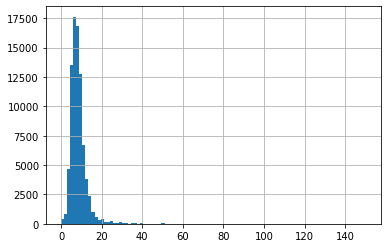

In [21]:
all_data_lagged["Close"].hist(bins=100);

Features seem to be positive skew, and have different scale. --> Need to standardise

In [22]:
all_data_lagged.columns

Index(['Date', 'HH', 'Time', 'Planned_Min_flag', 'Planned_Max_flag', 'month',
       'dayofweek', 'holiday', 'System_price(Yen/kWh)_lag_1_Day',
       'Price_Hokkaido(Yen/kWh)_lag_1_Day',
       ...
       'ForecastPV_Hokuriku_lag_3_Day', 'ForecastWind_Kansai_lag_3_Day',
       'Temp_Tokyo_lag_3_Day', 'SunLight(Time)_Tokyo_lag_3_Day',
       'WindSpeed(m/s)_Tokyo_lag_3_Day', 'WindDirection_Tokyo_lag_3_Day',
       'SunLight(MJ/㎡)_Tokyo_lag_3_Day', 'Gas_Price_lag_3_Day',
       'Oil_Price_lag_3_Day', 'Close'],
      dtype='object', length=161)

In [23]:
# Divide the data into two group: One is necessary to be lagged; another is not necessary to lagged
all_data_lagged1 = all_data_lagged[['Date', 'Time', 'HH', 'month', 'dayofweek', 'holiday', 'Planned_Min_flag', 'Planned_Max_flag']]
all_data_lagged2 = all_data_lagged.drop(['Date', 'Time', 'HH', 'month', 'dayofweek', 'holiday', 'Planned_Min_flag', 'Planned_Max_flag'], axis=1)

In [24]:
# # logarithmic transformation for standardised
from sklearn.preprocessing import PowerTransformer
def trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.transform(df2)

def inverse_trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.inverse_transform(df2)

In [27]:
#　Lag transform
all_data_log2_transformed = all_data_lagged2.copy()
cols = all_data_log2_transformed.columns

all_data_log2_transformed = trans_yeo_johnson(all_data_lagged2, all_data_log2_transformed)
all_data_log2_transformed = pd.DataFrame(all_data_log2_transformed)
all_data_log2_transformed.columns = cols

all_data_log = pd.concat([all_data_lagged1, all_data_log2_transformed], axis=1)

all_data_log.tail()

,Date,Time,HH,month,dayofweek,holiday,Planned_Min_flag,Planned_Max_flag,System_price(Yen/kWh)_lag_1_Day,Price_Hokkaido(Yen/kWh)_lag_1_Day,Price_Tokyo(Yen/kWh)_lag_1_Day,Price_Kansai(Yen/kWh)_lag_1_Day,BidExceed_diff_lag_1_Day,Spot_MA25d_lag_1_Day,Spot_MA75d_lag_1_Day,Spot_MA200d_lag_1_Day,VWAP_lag_1_Day,System_price(Yen/kWh)_lag_2_Day,Price_Hokkaido(Yen/kWh)_lag_2_Day,Price_Tokyo(Yen/kWh)_lag_2_Day,Price_Kansai(Yen/kWh)_lag_2_Day,BidExceed_diff_lag_2_Day,Spot_MA25d_lag_2_Day,Spot_MA75d_lag_2_Day,Spot_MA200d_lag_2_Day,VWAP_lag_2_Day,Open_lag_2_Day,High_lag_2_Day,Low_lag_2_Day,Close_lag_2_Day,Average_lag_2_Day,Volume(MWh/h)_lag_2_Day,Volume(Tick count)_lag_2_Day,HourlyDemand_Hokkaido_lag_2_Day,HourlyDemand_Tokyo_lag_2_Day,HourlyDemand_Kansai_lag_2_Day,HourlyDemand_Okinawa_lag_2_Day,Wind_TOH_lag_2_Day,Geothermal_TOH_lag_2_Day,PumpedStorage_TOH_lag_2_Day,Interconnection_TOH_lag_2_Day,Geothermal_HOK_lag_2_Day,Wind_HOK_lag_2_Day,Interconnection_HOK_lag_2_Day,Wind_TKO_lag_2_Day,Interconnection_TKO_lag_2_Day,Wind_CHB_lag_2_Day,Interconnection_CHB_lag_2_Day,Wind_HKU_lag_2_Day,PumpedStorage_HKU_lag_2_Day,Interconnection_HKU_lag_2_Day,Nuclear_KAN_lag_2_Day,Wind_KAN_lag_2_Day,Interconnection_KAN_lag_2_Day,Thermal_CHG_lag_2_Day,Water_CHG_lag_2_Day,Wind_CHG_lag_2_Day,Interconnection_CHG_lag_2_Day,Nuclear_SHI_lag_2_Day,Wind_SHI_lag_2_Day,Interconnection_SHI_lag_2_Day,Nuclear_KYU_lag_2_Day,Geothermal_KYU_lag_2_Day,PV_KYU_lag_2_Day,PVCurtailment_KYU_lag_2_Day,Wind_KYU_lag_2_Day,WindCurtailment_KYU_lag_2_Day,Interconnection_KYU_lag_2_Day,Thermal_OKI_lag_2_Day,Biomass_OKI_lag_2_Day,Wind_OKI_lag_2_Day,Allarea_TotalDemand_lag_2_Day,Allarea_Water_lag_2_Day,Allarea_Thermal_lag_2_Day,Allarea_Geothermal_lag_2_Day,Allarea_Biomass_lag_2_Day,Allarea_PumpedStorage_lag_2_Day,Allarea_Interconnection_lag_2_Day,Water_Ratio_lag_2_Day,Thermal_Ratio_lag_2_Day,Geothermal_Ratio_lag_2_Day,ForecastPV_Hokkaido_lag_2_Day,Forecast_PV_Chubu_lag_2_Day,Forecast_Wind_Chubu_lag_2_Day,ForecastPV_Hokuriku_lag_2_Day,ForecastWind_Kansai_lag_2_Day,Temp_Tokyo_lag_2_Day,SunLight(Time)_Tokyo_lag_2_Day,WindSpeed(m/s)_Tokyo_lag_2_Day,WindDirection_Tokyo_lag_2_Day,SunLight(MJ/㎡)_Tokyo_lag_2_Day,Gas_Price_lag_2_Day,Oil_Price_lag_2_Day,Open_lag_3_Day,High_lag_3_Day,Low_lag_3_Day,Close_lag_3_Day,Average_lag_3_Day,Volume(MWh/h)_lag_3_Day,Volume(Tick count)_lag_3_Day,HourlyDemand_Hokkaido_lag_3_Day,HourlyDemand_Tokyo_lag_3_Day,HourlyDemand_Kansai_lag_3_Day,HourlyDemand_Okinawa_lag_3_Day,Wind_TOH_lag_3_Day,Geothermal_TOH_lag_3_Day,PumpedStorage_TOH_lag_3_Day,Interconnection_TOH_lag_3_Day,Geothermal_HOK_lag_3_Day,Wind_HOK_lag_3_Day,Interconnection_HOK_lag_3_Day,Wind_TKO_lag_3_Day,Interconnection_TKO_lag_3_Day,Wind_CHB_lag_3_Day,Interconnection_CHB_lag_3_Day,Wind_HKU_lag_3_Day,PumpedStorage_HKU_lag_3_Day,Interconnection_HKU_lag_3_Day,Nuclear_KAN_lag_3_Day,Wind_KAN_lag_3_Day,Interconnection_KAN_lag_3_Day,Thermal_CHG_lag_3_Day,Water_CHG_lag_3_Day,Wind_CHG_lag_3_Day,Interconnection_CHG_lag_3_Day,Nuclear_SHI_lag_3_Day,Wind_SHI_lag_3_Day,Interconnection_SHI_lag_3_Day,Nuclear_KYU_lag_3_Day,Geothermal_KYU_lag_3_Day,PV_KYU_lag_3_Day,PVCurtailment_KYU_lag_3_Day,Wind_KYU_lag_3_Day,WindCurtailment_KYU_lag_3_Day,Interconnection_KYU_lag_3_Day,Thermal_OKI_lag_3_Day,Biomass_OKI_lag_3_Day,Wind_OKI_lag_3_Day,Allarea_TotalDemand_lag_3_Day,Allarea_Water_lag_3_Day,Allarea_Thermal_lag_3_Day,Allarea_Geothermal_lag_3_Day,Allarea_Biomass_lag_3_Day,Allarea_PumpedStorage_lag_3_Day,Allarea_Interconnection_lag_3_Day,Water_Ratio_lag_3_Day,Thermal_Ratio_lag_3_Day,Geothermal_Ratio_lag_3_Day,ForecastPV_Hokkaido_lag_3_Day,Forecast_PV_Chubu_lag_3_Day,Forecast_Wind_Chubu_lag_3_Day,ForecastPV_Hokuriku_lag_3_Day,ForecastWind_Kansai_lag_3_Day,Temp_Tokyo_lag_3_Day,SunLight(Time)_Tokyo_lag_3_Day,WindSpeed(m/s)_Tokyo_lag_3_Day,WindDirection_Tokyo_lag_3_Day,SunLight(MJ/㎡)_Tokyo_lag_3_Day,Gas_Price_lag_3_Day,Oil_Price_lag_3_Day,Close
83323,2020-12-31,21:30:00,44,12,3,0,0.0,0.0,5.267158,3.558592,4.146426,4.888108,-0.50481,3.118459,0.08

Skew: 0.016581
Kurt: 5.092394
Mean: -0.000000
Std: 1.000006


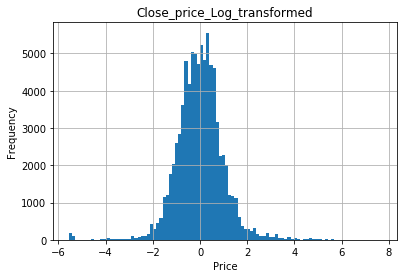

In [28]:
# Plot the lagged target
fig, ax = plt.subplots(1, figsize=plt.figaspect(.65))

all_data_log["Close"].hist(bins=100);
print("Skew: %f" % all_data_log["Close"].skew())
print("Kurt: %f" % all_data_log["Close"].kurt())
print("Mean: %f" % all_data_log["Close"].mean())
print("Std: %f" % all_data_log["Close"].std())
ax.set(title="Close_price_Log_transformed", ylabel="Frequency", xlabel="Price");

※ Confirm whether inverse transform works for Close price appropriately, or not

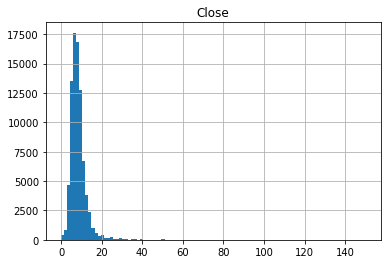

In [29]:
# Try to see whether inverse_trans_yeo_johnson works well (Only for target)
y_log_inversed = inverse_trans_yeo_johnson(all_data_lagged2["Close"].values.reshape(-1,1), all_data_log["Close"].values.reshape(-1, 1))
y_log_inversed = pd.DataFrame(y_log_inversed)
y_log_inversed.columns = ["Close"]
y_log_inversed.hist(bins=100);

# EDA (for all_data)

## Check the correlation of features with the target

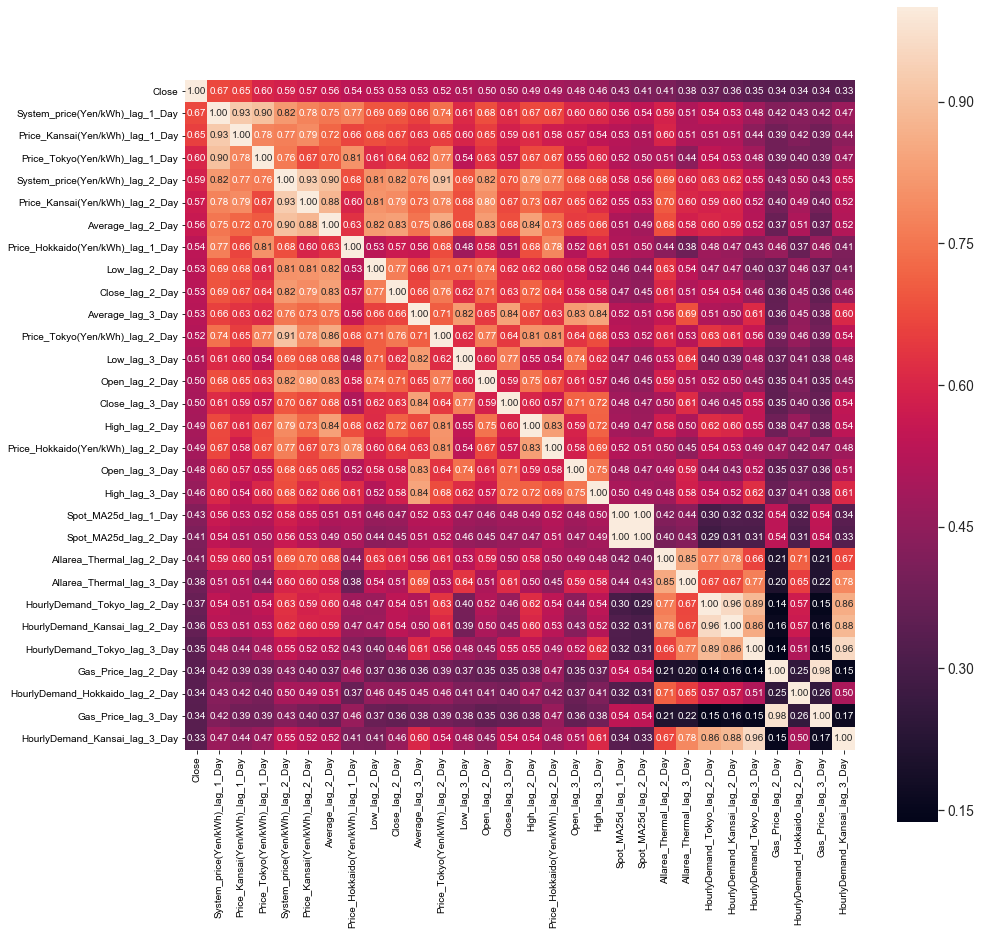

In [30]:
# correlation matrix
corrmat = all_data_log.corr()

# revenue correlation matrix
k = 30 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

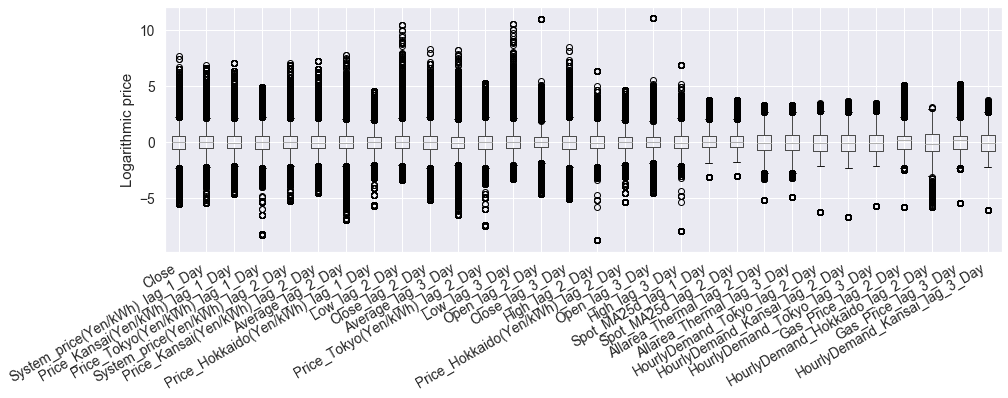

In [32]:
fig, ax = plt.subplots(1, figsize=(15, 5))
all_data_log[cols].boxplot()
plt.gcf().autofmt_xdate()
ax.set(ylabel="Logarithmic price");
plt.show()

In [33]:
all_data_log.tail()

,Date,Time,HH,month,dayofweek,holiday,Planned_Min_flag,Planned_Max_flag,System_price(Yen/kWh)_lag_1_Day,Price_Hokkaido(Yen/kWh)_lag_1_Day,Price_Tokyo(Yen/kWh)_lag_1_Day,Price_Kansai(Yen/kWh)_lag_1_Day,BidExceed_diff_lag_1_Day,Spot_MA25d_lag_1_Day,Spot_MA75d_lag_1_Day,Spot_MA200d_lag_1_Day,VWAP_lag_1_Day,System_price(Yen/kWh)_lag_2_Day,Price_Hokkaido(Yen/kWh)_lag_2_Day,Price_Tokyo(Yen/kWh)_lag_2_Day,Price_Kansai(Yen/kWh)_lag_2_Day,BidExceed_diff_lag_2_Day,Spot_MA25d_lag_2_Day,Spot_MA75d_lag_2_Day,Spot_MA200d_lag_2_Day,VWAP_lag_2_Day,Open_lag_2_Day,High_lag_2_Day,Low_lag_2_Day,Close_lag_2_Day,Average_lag_2_Day,Volume(MWh/h)_lag_2_Day,Volume(Tick count)_lag_2_Day,HourlyDemand_Hokkaido_lag_2_Day,HourlyDemand_Tokyo_lag_2_Day,HourlyDemand_Kansai_lag_2_Day,HourlyDemand_Okinawa_lag_2_Day,Wind_TOH_lag_2_Day,Geothermal_TOH_lag_2_Day,PumpedStorage_TOH_lag_2_Day,Interconnection_TOH_lag_2_Day,Geothermal_HOK_lag_2_Day,Wind_HOK_lag_2_Day,Interconnection_HOK_lag_2_Day,Wind_TKO_lag_2_Day,Interconnection_TKO_lag_2_Day,Wind_CHB_lag_2_Day,Interconnection_CHB_lag_2_Day,Wind_HKU_lag_2_Day,PumpedStorage_HKU_lag_2_Day,Interconnection_HKU_lag_2_Day,Nuclear_KAN_lag_2_Day,Wind_KAN_lag_2_Day,Interconnection_KAN_lag_2_Day,Thermal_CHG_lag_2_Day,Water_CHG_lag_2_Day,Wind_CHG_lag_2_Day,Interconnection_CHG_lag_2_Day,Nuclear_SHI_lag_2_Day,Wind_SHI_lag_2_Day,Interconnection_SHI_lag_2_Day,Nuclear_KYU_lag_2_Day,Geothermal_KYU_lag_2_Day,PV_KYU_lag_2_Day,PVCurtailment_KYU_lag_2_Day,Wind_KYU_lag_2_Day,WindCurtailment_KYU_lag_2_Day,Interconnection_KYU_lag_2_Day,Thermal_OKI_lag_2_Day,Biomass_OKI_lag_2_Day,Wind_OKI_lag_2_Day,Allarea_TotalDemand_lag_2_Day,Allarea_Water_lag_2_Day,Allarea_Thermal_lag_2_Day,Allarea_Geothermal_lag_2_Day,Allarea_Biomass_lag_2_Day,Allarea_PumpedStorage_lag_2_Day,Allarea_Interconnection_lag_2_Day,Water_Ratio_lag_2_Day,Thermal_Ratio_lag_2_Day,Geothermal_Ratio_lag_2_Day,ForecastPV_Hokkaido_lag_2_Day,Forecast_PV_Chubu_lag_2_Day,Forecast_Wind_Chubu_lag_2_Day,ForecastPV_Hokuriku_lag_2_Day,ForecastWind_Kansai_lag_2_Day,Temp_Tokyo_lag_2_Day,SunLight(Time)_Tokyo_lag_2_Day,WindSpeed(m/s)_Tokyo_lag_2_Day,WindDirection_Tokyo_lag_2_Day,SunLight(MJ/㎡)_Tokyo_lag_2_Day,Gas_Price_lag_2_Day,Oil_Price_lag_2_Day,Open_lag_3_Day,High_lag_3_Day,Low_lag_3_Day,Close_lag_3_Day,Average_lag_3_Day,Volume(MWh/h)_lag_3_Day,Volume(Tick count)_lag_3_Day,HourlyDemand_Hokkaido_lag_3_Day,HourlyDemand_Tokyo_lag_3_Day,HourlyDemand_Kansai_lag_3_Day,HourlyDemand_Okinawa_lag_3_Day,Wind_TOH_lag_3_Day,Geothermal_TOH_lag_3_Day,PumpedStorage_TOH_lag_3_Day,Interconnection_TOH_lag_3_Day,Geothermal_HOK_lag_3_Day,Wind_HOK_lag_3_Day,Interconnection_HOK_lag_3_Day,Wind_TKO_lag_3_Day,Interconnection_TKO_lag_3_Day,Wind_CHB_lag_3_Day,Interconnection_CHB_lag_3_Day,Wind_HKU_lag_3_Day,PumpedStorage_HKU_lag_3_Day,Interconnection_HKU_lag_3_Day,Nuclear_KAN_lag_3_Day,Wind_KAN_lag_3_Day,Interconnection_KAN_lag_3_Day,Thermal_CHG_lag_3_Day,Water_CHG_lag_3_Day,Wind_CHG_lag_3_Day,Interconnection_CHG_lag_3_Day,Nuclear_SHI_lag_3_Day,Wind_SHI_lag_3_Day,Interconnection_SHI_lag_3_Day,Nuclear_KYU_lag_3_Day,Geothermal_KYU_lag_3_Day,PV_KYU_lag_3_Day,PVCurtailment_KYU_lag_3_Day,Wind_KYU_lag_3_Day,WindCurtailment_KYU_lag_3_Day,Interconnection_KYU_lag_3_Day,Thermal_OKI_lag_3_Day,Biomass_OKI_lag_3_Day,Wind_OKI_lag_3_Day,Allarea_TotalDemand_lag_3_Day,Allarea_Water_lag_3_Day,Allarea_Thermal_lag_3_Day,Allarea_Geothermal_lag_3_Day,Allarea_Biomass_lag_3_Day,Allarea_PumpedStorage_lag_3_Day,Allarea_Interconnection_lag_3_Day,Water_Ratio_lag_3_Day,Thermal_Ratio_lag_3_Day,Geothermal_Ratio_lag_3_Day,ForecastPV_Hokkaido_lag_3_Day,Forecast_PV_Chubu_lag_3_Day,Forecast_Wind_Chubu_lag_3_Day,ForecastPV_Hokuriku_lag_3_Day,ForecastWind_Kansai_lag_3_Day,Temp_Tokyo_lag_3_Day,SunLight(Time)_Tokyo_lag_3_Day,WindSpeed(m/s)_Tokyo_lag_3_Day,WindDirection_Tokyo_lag_3_Day,SunLight(MJ/㎡)_Tokyo_lag_3_Day,Gas_Price_lag_3_Day,Oil_Price_lag_3_Day,Close
83323,2020-12-31,21:30:00,44,12,3,0,0.0,0.0,5.267158,3.558592,4.146426,4.888108,-0.50481,3.118459,0.08

# Training Models with "all_data"

## Preparation

In [34]:
X = all_data_log.drop(['Close', 'Date', 'Time'], axis=1)
y = all_data_log.Closey = all_data_log.Close

Split all_data into train and valid for validation

In [35]:
# Rolling/Walk forward validation (Timeseries validation with the parameter of "max_train_size")
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
train_ratio=8
test_ratio=2
max_train_size= 48*365
test_size=int(round((len(X)*test_ratio)/(train_ratio+test_ratio*n_splits), 0))

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size
                       , max_train_size=max_train_size
                      )
Min_valid_index = len(X) - (n_splits * test_size)

print(tscv)
print('Minimum of valid_index: %.0f' % Min_valid_index)

# Confirming the split logic
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print("TRAIN:", train_index, "Valid:", valid_index)

TimeSeriesSplit(gap=0, max_train_size=17520, n_splits=10, test_size=5952)
Minimum of valid_index: 23808
TRAIN: [ 6288  6289  6290 ... 23805 23806 23807] Valid: [23808 23809 23810 ... 29757 29758 29759]
TRAIN: [12240 12241 12242 ... 29757 29758 29759] Valid: [29760 29761 29762 ... 35709 35710 35711]
TRAIN: [18192 18193 18194 ... 35709 35710 35711] Valid: [35712 35713 35714 ... 41661 41662 41663]
TRAIN: [24144 24145 24146 ... 41661 41662 41663] Valid: [41664 41665 41666 ... 47613 47614 47615]
TRAIN: [30096 30097 30098 ... 47613 47614 47615] Valid: [47616 47617 47618 ... 53565 53566 53567]
TRAIN: [36048 36049 36050 ... 53565 53566 53567] Valid: [53568 53569 53570 ... 59517 59518 59519]
TRAIN: [42000 42001 42002 ... 59517 59518 59519] Valid: [59520 59521 59522 ... 65469 65470 65471]
TRAIN: [47952 47953 47954 ... 65469 65470 65471] Valid: [65472 65473 65474 ... 71421 71422 71423]
TRAIN: [53904 53905 53906 ... 71421 71422 71423] Valid: [71424 71425 71426 ... 77373 77374 77375]
TRAIN: [59856 

Make the tables for graph visualisation and for evaluation results

In [33]:
# DataTable for graph_log
graph_data_log = all_data_log[["Date", "Time", "Close"]]
graph_data_log["DateTime"] = pd.to_datetime(graph_data_log["Date"].astype(str) + " " + graph_data_log["Time"].astype(str))
prediction_point = graph_data_log["DateTime"][graph_data_log.index==Min_valid_index].iat[-1]
graph_data_log = graph_data_log.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation results_log
Eval_table_log = pd.DataFrame()
Eval_table_log["EvalFunc"] = pd.Series(["RMSE_log", "MAE_log"])
Eval_table_log

Prediction_point: 2017-08-10 00:00:00


,EvalFunc
0,RMSE_log
1,MAE_log


In [34]:
# DataTable for graph_original
graph_data_original = all_data_lagged[["Date", "Time", "Close"]]
graph_data_original["DateTime"] = pd.to_datetime(graph_data_original["Date"].astype(str) + " " + graph_data_original["Time"].astype(str))
prediction_point = graph_data_original["DateTime"][graph_data_original.index==Min_valid_index].iat[-1]
graph_data_original = graph_data_original.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation functions_original
Eval_table_original = pd.DataFrame()
Eval_table_original["EvalFunc"] = pd.Series(["RMSE_Yen/kWh", "MAE_Yen/kWh"])
Eval_table_original

Prediction_point: 2017-08-10 00:00:00


,EvalFunc
0,RMSE_Yen/kWh
1,MAE_Yen/kWh


## Linear model

### Linear regression

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
import itertools

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Line = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLine = LinearRegression().fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLine.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Line.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Line = list(itertools.chain.from_iterable(prediction_Line))
#  Get prediction with train data
modelLine = LinearRegression().fit(X, y)
y_pred_train = list(modelLine.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Linear"] = pd.Series(y_pred_train + prediction_Line)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Linear"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Linear = pd.Series(rmse)
mae_10fold_Linear = pd.Series(mae)

Training_accuracy: 0.49501441471715035
Valid_accuracy: -59.59192777461236
RMSE: 3.2505357772809846
MAE: 3.0250854128472877


### Ridge

In [38]:
# Searching the optimal alpha
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.1, 1, 3, 7, 10]: # alphaで特に結果の違いなし (0.1, 1, 3, 7, 10)
        modelRidge = Ridge(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelRidge.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelRidge.score(X_valid, y_valid)))
        y_pred = modelRidge.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelRidge.coef_ != 0)))


 alpha=0.1
Train set score: 0.55
Test set score: 0.21
RMSE: 0.70
MAE: 0.51
Number of features used:155

 alpha=1
Train set score: 0.55
Test set score: 0.21
RMSE: 0.70
MAE: 0.51
Number of features used:155

 alpha=3
Train set score: 0.55
Test set score: 0.21
RMSE: 0.70
MAE: 0.51
Number of features used:155

 alpha=7
Train set score: 0.55
Test set score: 0.22
RMSE: 0.70
MAE: 0.51
Number of features used:155

 alpha=10
Train set score: 0.55
Test set score: 0.22
RMSE: 0.70
MAE: 0.51
Number of features used:155

 alpha=0.1
Train set score: 0.49
Test set score: -0.75
RMSE: 1.19
MAE: 0.99
Number of features used:155

 alpha=1
Train set score: 0.49
Test set score: -0.61
RMSE: 1.14
MAE: 0.95
Number of features used:155

 alpha=3
Train set score: 0.49
Test set score: -0.48
RMSE: 1.10
MAE: 0.91
Number of features used:155

 alpha=7
Train set score: 0.49
Test set score: -0.32
RMSE: 1.03
MAE: 0.85
Number of features used:155

 alpha=10
Train set score: 0.49
Test set score: -0.23
RMSE: 1.00
MAE: 0.

10 is the optimal

In [39]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Ridge = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model
    modelRidge = linear_model.Ridge(alpha=10).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelRidge.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Ridge.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelRidge.score(X_train, y_train))     
    valid_accuracy.append(modelRidge.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Ridge = list(itertools.chain.from_iterable(prediction_Ridge))
#  Get prediction with train data
modelRidge = linear_model.Ridge(alpha=10).fit(X, y)
y_pred_train = list(modelRidge.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Ridge"] = pd.Series(y_pred_train + prediction_Ridge)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Ridge"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Ridge = pd.Series(rmse)
mae_10fold_Ridge = pd.Series(mae)

Training_accuracy: 0.4925573985031703
Valid_accuracy: -0.0021419138380634915
RMSE: 0.9058134609385501
MAE: 0.6789580494973471


### Lasso

In [42]:
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.02, 0.5, 1]: #0.02 is the best (0.02, 0.5, 1)
        modelLasso = Lasso(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelLasso.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelLasso.score(X_valid, y_valid)))
        y_pred = modelLasso.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelLasso.coef_ != 0)))


 alpha=0.02
Train set score: 0.51
Test set score: 0.32
RMSE: 0.65
MAE: 0.47
Number of features used:23

 alpha=0.5
Train set score: 0.08
Test set score: 0.04
RMSE: 0.77
MAE: 0.58
Number of features used:2

 alpha=1
Train set score: 0.05
Test set score: 0.03
RMSE: 0.78
MAE: 0.59
Number of features used:1

 alpha=0.02
Train set score: 0.44
Test set score: 0.44
RMSE: 0.67
MAE: 0.50
Number of features used:25

 alpha=0.5
Train set score: 0.05
Test set score: -0.37
RMSE: 1.05
MAE: 0.79
Number of features used:1

 alpha=1
Train set score: 0.04
Test set score: -0.37
RMSE: 1.06
MAE: 0.79
Number of features used:1

 alpha=0.02
Train set score: 0.53
Test set score: 0.44
RMSE: 0.65
MAE: 0.47
Number of features used:22

 alpha=0.5
Train set score: 0.05
Test set score: 0.04
RMSE: 0.85
MAE: 0.59
Number of features used:2

 alpha=1
Train set score: 0.04
Test set score: 0.04
RMSE: 0.85
MAE: 0.59
Number of features used:1

 alpha=0.02
Train set score: 0.51
Test set score: 0.30
RMSE: 0.56
MAE: 0.44
Num

0.02 is the optimal

In [43]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Lasso = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLasso = linear_model.Lasso(alpha=0.02).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLasso.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Lasso.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLasso.score(X_train, y_train))     
    valid_accuracy.append(modelLasso.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Lasso = list(itertools.chain.from_iterable(prediction_Lasso))
#  Get prediction with train data
modelLasso = linear_model.Lasso(alpha=0.02).fit(X, y)
y_pred_train = list(modelLasso.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Lasso"] = pd.Series(y_pred_train + prediction_Lasso)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Lasso"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Lasso = pd.Series(rmse)
mae_10fold_Lasso = pd.Series(mae)

Training_accuracy: 0.45044087579550823
Valid_accuracy: 0.3372356817348764
RMSE: 0.741565799978881
MAE: 0.5246821259945508


### Elestic Net

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

modelElastic = ElasticNet()

# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] =  list(np.arange(0, 1.1, 0.1).round(2))
# define search
search_mae = GridSearchCV(modelElastic, grid, scoring='neg_mean_absolute_error', cv=tscv, n_jobs=-1)
search_rmse = GridSearchCV(modelElastic, grid, scoring='neg_root_mean_squared_error', cv=tscv, n_jobs=-1)
# perform the search
results_mae = search_mae.fit(X, y)
results_rmse = search_rmse.fit(X, y)
# summarize
print('MAE: %.3f' % results_mae.best_score_)
print('Config_MAE: %s' % results_mae.best_params_)
print('RMSE: %.3f' % results_rmse.best_score_)
print('Config_RMSE: %s' % results_rmse.best_params_)

MAE: -0.526
Config_MAE: {'alpha': 0.1, 'l1_ratio': 0.3}
RMSE: -0.746
Config_RMSE: {'alpha': 0.1, 'l1_ratio': 0.2}


In [178]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Elestic = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelElastic = ElasticNet(alpha=0.1, l1_ratio=0.2).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelElastic.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Elestic.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelElastic.score(X_train, y_train))     
    valid_accuracy.append(modelElastic.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Elestic = list(itertools.chain.from_iterable(prediction_Elestic))
#  Get prediction with train data
modelElastic = ElasticNet(alpha=0.1, l1_ratio=0.2).fit(X, y)
y_pred_train = list(modelElastic.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Elastic"] = pd.Series(y_pred_train + prediction_Lasso)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Elastic"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Elastic = pd.Series(rmse)
mae_10fold_Elastic = pd.Series(mae)

Training_accuracy: 0.447560800453681
Valid_accuracy: 0.328912535646995
RMSE: 0.7461957895086849
MAE: 0.5274339941670583


### Interpretation of the linear model
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [47]:
print("Intercept: {}".format(modelLine.intercept_))

feature_names = X_train.columns
coefs = pd.DataFrame(modelLasso.coef_, columns=['Coefficients'], index=feature_names
).sort_values('Coefficients', ascending=False)

# Absolute value of coefficients
coef_abs = coefs.abs()
print(coef_abs.head(10))

Intercept: 0.2164378051491837
                                   Coefficients
System_price(Yen/kWh)_lag_1_Day        0.296036
Price_Kansai(Yen/kWh)_lag_1_Day        0.192718
Low_lag_3_Day                          0.048186
Close_lag_2_Day                        0.047103
Average_lag_3_Day                      0.032154
HourlyDemand_Hokkaido_lag_2_Day        0.026912
Close_lag_3_Day                        0.024976
Interconnection_HKU_lag_2_Day          0.023100
Price_Hokkaido(Yen/kWh)_lag_1_Day      0.020751
Interconnection_SHI_lag_3_Day          0.020183


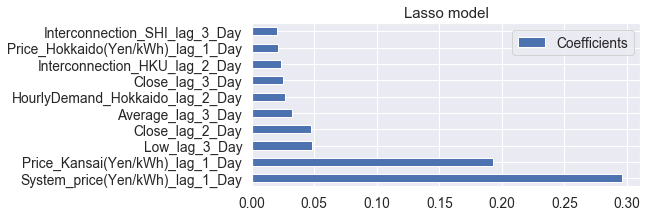

In [48]:
# Positive coeficients
coefs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

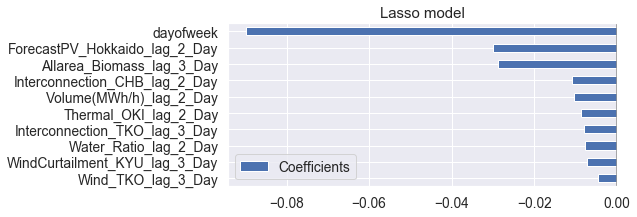

In [49]:
# Negative coeficients
end = len(coefs)
start = end - 10
coefs[start:end].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [216]:
coef_abs

,Coefficients
System_price(Yen/kWh)_lag_1_Day,0.296036
Price_Kansai(Yen/kWh)_lag_1_Day,0.192718
Low_lag_3_Day,0.048186
Close_lag_2_Day,0.047103
Average_lag_3_Day,0.032154
HourlyDemand_Hokkaido_lag_2_Day,0.026912
Close_lag_3_Day,0.024976
Interconnection_HKU_lag_2_Day,0.023100
Price_Hokkaido(Yen/kWh)_lag_1_Day,0.020751
Interconnection_SHI_lag_3_Day,0.020183


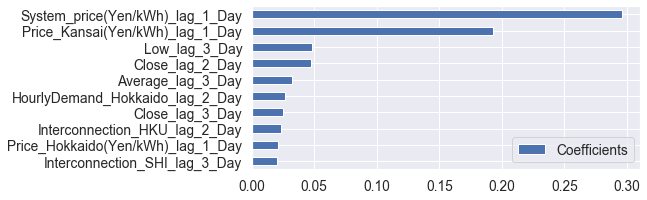

In [219]:
# Absolute coeficients
coef_abs[:10].sort_values("Coefficients", ascending=True).plot(kind='barh', figsize=(9, 3))
# plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Non-linear model

## Linear Regression with PolynomialFeatures

## XGBoost

In [53]:
from xgboost import XGBRegressor

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_XGB = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    #Fit train set to the model
    modelXGB = XGBRegressor().fit(X_train, y_train)   
    # Generate prediction results
    y_pred = modelXGB.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_XGB.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelXGB.score(X_train, y_train))     
    valid_accuracy.append(modelXGB.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_XGB = list(itertools.chain.from_iterable(prediction_XGB))
#  Get prediction with train data
modelXGB = XGBRegressor().fit(X, y)   
y_pred_train = list(modelXGB.predict(X)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_XGB"] = pd.Series(y_pred_train + prediction_XGB)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["XGB"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_XGB = pd.Series(rmse)
mae_10fold_XGB = pd.Series(mae)

Training_accuracy: 0.8791341558488732
Valid_accuracy: -0.06702225500202783
RMSE: 0.9375118147031689
MAE: 0.7012407075519623


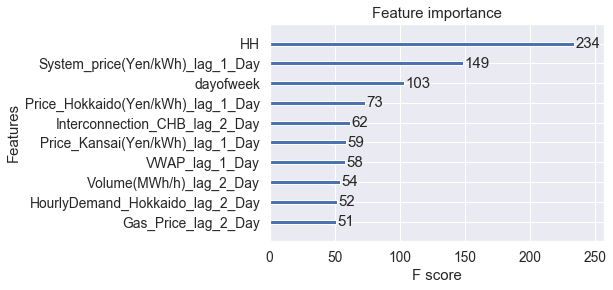

<Figure size 1000x800 with 0 Axes>

In [211]:
# Feature importance of the last train set
from xgboost import plot_importance

# plot feature importance
plot_importance(modelXGB, max_num_features = 10)
plt.figure(figsize=(10, 8),dpi=100)
plt.show()

# ARIMA model
Parameters of the model is tuned on "04_ParameterTuning_ARIMA_SARIMA"

In [55]:
# Top 5 coefficient from Linear model
coef_abs_list = list(coef_abs[:5].index)
# Pick up  Date, Time , Close and cols that have high importance on the linear model
arima_cols = ["Date", "Time", "Close"]
arima_cols = arima_cols + coef_abs_list
arima_cols

['Date',
 'Time',
 'Close',
 'System_price(Yen/kWh)_lag_1_Day',
 'Price_Kansai(Yen/kWh)_lag_1_Day',
 'Low_lag_3_Day',
 'Close_lag_2_Day',
 'Average_lag_3_Day']

In [57]:
# Data for statistical modeling
all_data_stats = all_data_log.copy()
all_data_stats = all_data_stats[arima_cols]
all_data_stats["DateTime"] = pd.to_datetime(all_data_stats["Date"].astype(str) + " " + all_data_stats["Time"].astype(str))
all_data_stats = all_data_stats.drop(["Date", "Time"], axis=1)
X_stats = all_data_stats.drop(['Close', "DateTime"], axis=1)
X_stats =  np.array(X_stats)
y_stats = all_data_stats[["Close"]]
y_stats =  np.array(y_stats)

# ADF test for logarithmic price
ctt = sm.tsa.adfuller(y_stats, regression="ctt")
round(ctt[1], 4)

0.0

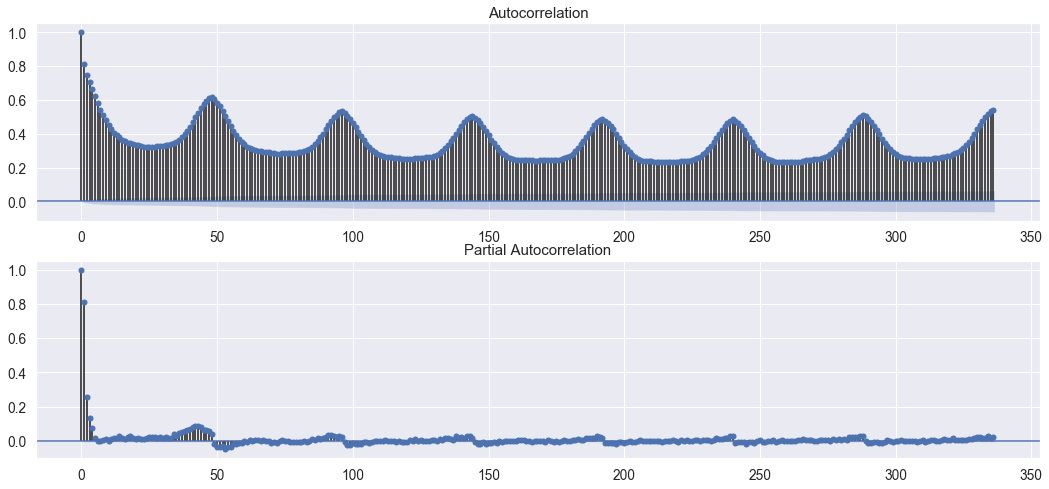

In [58]:
# Autocorrelation
fig = plt.figure(figsize=(18,8))
# Autocorrelation (1lag=30min --> 336 lags=1week)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_stats, lags=336, ax=ax1)

# Partial Autocorrelation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_stats, lags=336, ax=ax2)

### ARIMAX model

In [59]:
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(y_stats, order=(3, 0, 2), exog=X_stats).fit()

# Summary
print(modelARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                83328
Model:                 ARIMA(3, 0, 2)   Log Likelihood              -65113.157
Date:                Fri, 14 May 2021   AIC                         130250.314
Time:                        09:05:11   BIC                         130362.280
Sample:                             0   HQIC                        130284.574
                              - 83328                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.011      0.064      0.949      -0.021       0.022
x1             0.3243      0.006     55.867      0.000       0.313       0.336
x2             0.1266      0.006     21.458      0.0

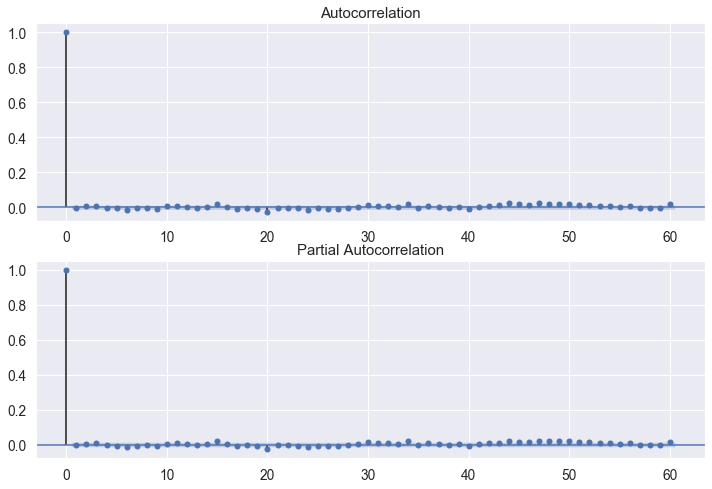

In [163]:
# Check the residual
resid = modelARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=60, ax=ax2)

In [61]:
# Training with cross validation
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_ARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 

    #Fit train set to the model
    modelARIMA = ARIMA(y_train, order=(3, 0, 2), exog=X_train).fit()
    # Generate prediction results
    y_pred = modelARIMA.forecast(steps=test_size, exog=X_valid) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_ARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_ARIMA = list(itertools.chain.from_iterable(prediction_ARIMA))
# Get prediction with train data
all_train = all_data_stats.iloc[:Min_valid_index].set_index("DateTime")
X_train = all_train.drop(['Close'], axis=1)
X_train =  np.array(X_train)
modelARIMA = ARIMA(all_data_stats.Close[:Min_valid_index], order=(3, 0, 2), exog=X_train).fit()
y_pred_train = list(modelARIMA.predict())
# Store the prediction into the "graph data" table
graph_data_log = graph_data_log.reset_index()
graph_data_log["Close_pred_ARIMA"] = pd.Series(y_pred_train + prediction_ARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["ARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 0.7522857013150935
MAE: 0.5269089174717264


# SARIMAX model

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelSARIMA = SARIMAX(y_stats[83328-17520:], 
                       order=(3, 0, 2), seasonal_order=(0, 1, 1, 48), exog=X_stats[83328-17520:]).fit()
print(modelSARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                17520
Model:             SARIMAX(3, 0, 2)x(0, 1, [1], 48)   Log Likelihood              -18063.813
Date:                              Fri, 14 May 2021   AIC                          36151.626
Time:                                      09:43:14   BIC                          36244.847
Sample:                                           0   HQIC                         36182.326
                                            - 17520                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2163      0.013     17.067      0.000       0.191       0.241
x2             0.08

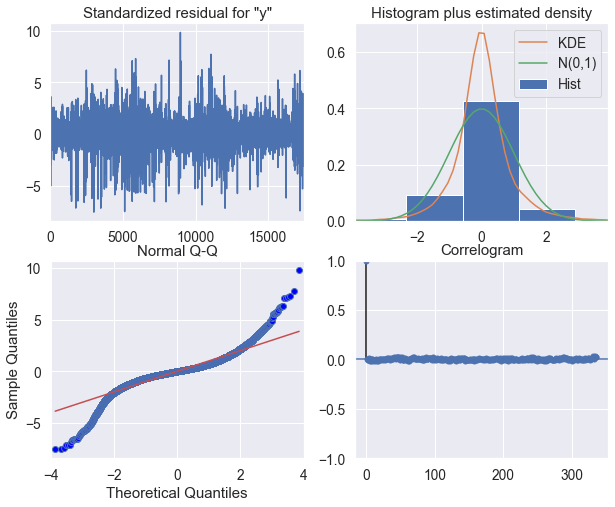

In [63]:
# Check residual (If periodicity can be seen, SARIMA model would be better)
# Plot/confirm residual (White noise)
modelSARIMA.plot_diagnostics(lags=336, figsize=[10, 8]);

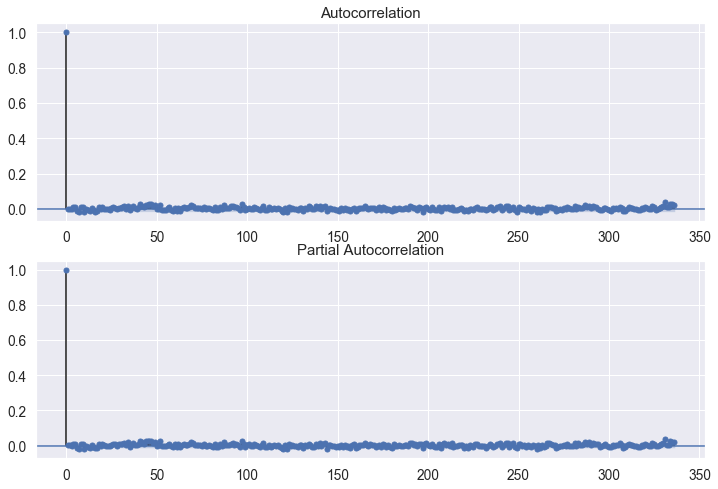

In [64]:
# Plot pertial Autocorrelation
resid = modelSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=336, ax=ax2)

SARIMAモデルのほうが季節性をカバーできているみたい --> SARIMAXですすめる

In [65]:
# Training with cross validation
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_SARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 
 
    #Fit train set to the model
    modelSARIMA = SARIMAX(y_train, 
                          order=(1, 1, 3), seasonal_order=(0, 1, 1, 48), 
                          exog=X_train).fit()
    # Generate prediction results
    y_pred = modelSARIMA.forecast(steps=test_size, exog=X_valid) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_SARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_SARIMA = list(itertools.chain.from_iterable(prediction_SARIMA))
# get prediction with train data
all_train = all_data_stats.iloc[Min_valid_index-max_train_size:Min_valid_index].set_index("DateTime")
X_train = all_train.drop(['Close'], axis=1)
X_train =  np.array(X_train)
modelSARIMA = SARIMAX(all_data_stats[Min_valid_index-max_train_size:Min_valid_index].Close, 
                      order=(3, 0, 2), seasonal_order=(0, 1, 1, 48), exog=X_train).fit()
y_pred_train = modelSARIMA.predict()
# Store the prediction into the "graph data" table
graph_data_log = graph_data_log.reset_index()
train_SARIMA = pd.concat([modelSARIMA.predict(), pd.Series(prediction_SARIMA)]).reset_index(drop=True)
train_SARIMA.index = train_SARIMA.index + modelSARIMA.predict().index[0]
graph_data_log["Close_pred_SARIMA"] = train_SARIMA
# Ignore from outcome until the index of 6288
graph_data_log["Close_pred_SARIMA"] = graph_data_log["Close_pred_SARIMA"].fillna(0)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["SARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 0.966067812317392
MAE: 0.744315096188549


## Prophet
Document of Prophet from Facebook
https://peerj.com/preprints/3190/

数式の理解
https://devblog.thebase.in/entry/2019/12/20/110000_1

日本語の解説 (公式ではないが結構細かい)
https://mikiokubo.github.io/analytics/15forecast.html

外部変数追加のチュートリアル
https://nbviewer.jupyter.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

In [66]:
# # Pick up  Date, Time , Close and cols that have high importance on the linear model
X_cols =  coef_abs_list

In [67]:
all_data_prop = all_data_lagged[X_cols]
all_data_prop["Date"], all_data_prop["Time"], all_data_prop["Close"] = all_data_lagged["Date"], all_data_lagged["Time"], all_data_lagged["Close"]
all_data_prop["DateTime"] = pd.to_datetime(all_data_prop["Date"].astype(str) + " " + all_data_prop["Time"].astype(str))
all_data_prop = all_data_prop.drop(["Date", "Time"], axis=1)
all_data_prop.tail()

,System_price(Yen/kWh)_lag_1_Day,Price_Kansai(Yen/kWh)_lag_1_Day,Low_lag_3_Day,Close_lag_2_Day,Average_lag_3_Day,Close,DateTime
83323,50.00,50.00,6.54,14.90,13.15,70.00,2020-12-31 21:30:00
83324,50.00,50.00,9.24,9.90,20.65,45.48,2020-12-31 22:00:00
83325,40.00,50.00,5.37,29.82,16.48,41.33,2020-12-31 22:30:00
83326,33.21,33.21,4.18,4.05,12.46,36.66,2020-12-31 23:00:00
83327,25.00,25.00,5.30,4.18,12.44,26.46,2020-12-31 23:30:00


In [68]:
# Set ds and y for the model
all_data_prop = all_data_prop.rename(columns={'DateTime': 'ds', 'Close': 'y'})

In [69]:
# Divide dataset into train/valid set
all_data_prop_train = all_data_prop.iloc[all_data_prop.index[:len(X)-test_size]]
all_data_prop_valid = all_data_prop.iloc[all_data_prop.index[len(X)-test_size:]]

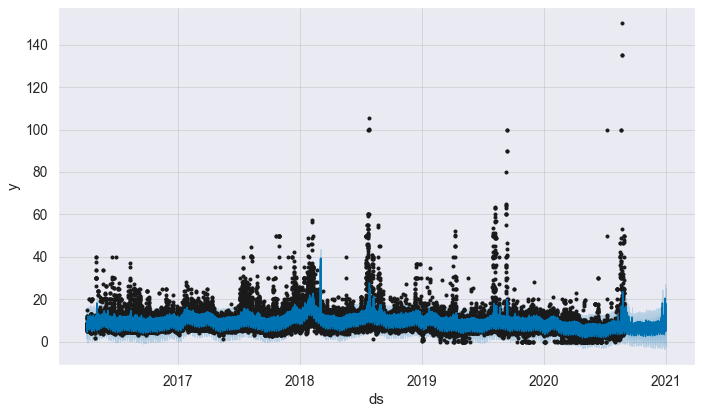

In [70]:
from fbprophet import Prophet
modelProp = Prophet()
# set exog for train data
for x in X_cols:
    modelProp = Prophet().add_regressor(x)

# fit train data
modelProp = modelProp.fit(all_data_prop_train)
# Make prediction datatable
future = modelProp.make_future_dataframe(periods=len(all_data_prop_valid), freq='30min')

# set exog for valid data
for x in X_cols:
    future[x] = all_data_prop[x]

# Plot
forecast = modelProp.predict(future)
modelProp.plot(forecast);

In [71]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Prophet = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)
    
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    train_prop, valid_prop = all_data_prop.iloc[train_index], all_data_prop.iloc[valid_index]
#     y_train, y_valid = train_prop.set_index("ds"), valid_prop.set_index("ds")

    # Add exog for train data
    for x in X_cols:
        modelProphet = Prophet(yearly_seasonality=True).add_regressor(x)
    
    # fit train data
    modelProphet = modelProphet.fit(train_prop) 
    # Make prediction datatable (Need to adjust the parameter of period to match the number of rows)
    future = modelProphet.make_future_dataframe(periods=len(valid_prop), freq='30min')
    # Add exog for valid data
    for x in X_cols:
        # Add exog for valid data
        future[x] = all_data_prop[x]
    
    # Generate prediction results
#     future = future.fillna(0, inplace=True)
    forecast = modelProphet.predict(future)
    forecast.index = forecast.index + train_index[0] # index adjustment due to max_train_size

    y_pred = forecast["yhat"][valid_index]
    true_values = valid_prop["y"]
    # Save prediction results
    prediction_Prophet.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Prophet = list(itertools.chain.from_iterable(prediction_Prophet))

# Prediction with train data
for x in X_cols:
    modelProphet = Prophet(yearly_seasonality=True).add_regressor(x)
modelProphet = modelProphet.fit(all_data_prop[:Min_valid_index]) 
future = modelProphet.make_future_dataframe(periods=len(valid_prop), freq='30min')
for x in X_cols:
        # Add exog for valid data
        future[x] = all_data_prop[x]
forecast = modelProphet.predict(future)
forecast.index = forecast.index + train_index[0]
y_pred_train = list(forecast["yhat"][:Min_valid_index])

# Store the prediction into the "graph data" table
graph_data_original["Close_pred_Prophet"] = pd.Series(y_pred_train + prediction_Prophet)
# Store the result of evaluation into the "Eval_table"
Eval_table_original["Prophet"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 5.880753114957787
MAE: 4.153039187188914


In [74]:
graph_data_log

,level_0,index,Close,Close_pred_Linear,Close_pred_Ridge,Close_pred_Lasso,Close_pred_XGB,Close_pred_ARIMA,Close_pred_SARIMA
DateTime,,,,,,,,,
2016-04-01 00:00:00,0,0,-0.074394,-1.437308,-1.444941,-3.504752,-0.082786,-3.086249,-0.096164
2016-04-01 00:30:00,1,1,-0.147622,-1.435665,-1.443286,-3.503124,-0.082786,-0.900545,-0.107812
2016-04-01 01:00:00,2,2,-0.222905,-1.434021,-1.441631,-3.501495,-0.082786,-0.762754,-0.152091
2016-04-01 01:30:00,3,3,-0.271054,-1.432378,-1.439976,-3.499867,-0.082786,-0.726969,-0.155397
2016-04-01 02:00:00,4,4,-0.222905,-1.487192,-1.494441,-3.498238,-0.082786,-0.708712,-0.165921
...,...,...,...,...,...,...,...,...,...
2020-12-31 21:30:00,83323,83323,5.569199,0.413362,-0.026961,2.104296,1.247210,2.209584,NaN
2020-12-31 22:00:00,83324,83324,4.406511,0.569201,0.116119,2.201828,1.212819,2.396836,NaN
2020-12-31 22:30:00,83325,83325,4.151522,0.240837,-0.193835,1.990095,1.142720,2.104270,NaN


# Visualisation of the model performance 

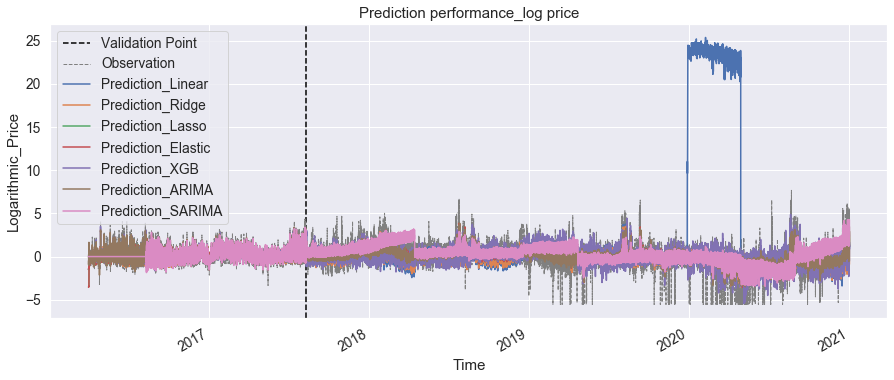

In [198]:
graph_data_log = graph_data_log.reset_index()

#対数化されたターゲットと予測値の比較

Models = [
    "Linear", "Ridge", "Lasso", "Elastic",
    "XGB", "ARIMA", "SARIMA" 
         ]

fig, ax = plt.subplots(1, figsize=(15, 6))
plt.title('Prediction performance_log price')

# Set index
graph_data_log = graph_data_log.set_index("DateTime")
start = "2016-04-01 00:00:00"
end = "2020-12-31 23:30:00"

# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Validation Point", linestyle="dashed", color="black")
# Add text for the vertical line
# plt.text(prediction_point.to_pydatetime(), -2, 'Prediction Point',rotation=0)

# Plot Close 
graph_data_log.Close[graph_data_log.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

for model in Models:
    graph_data_log["Close_pred_" + model][graph_data_log.index > start].plot(ax=ax, label="Prediction_" + model)

# x-axis
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Logarithmic_Price")
plt.legend(loc="upper left");

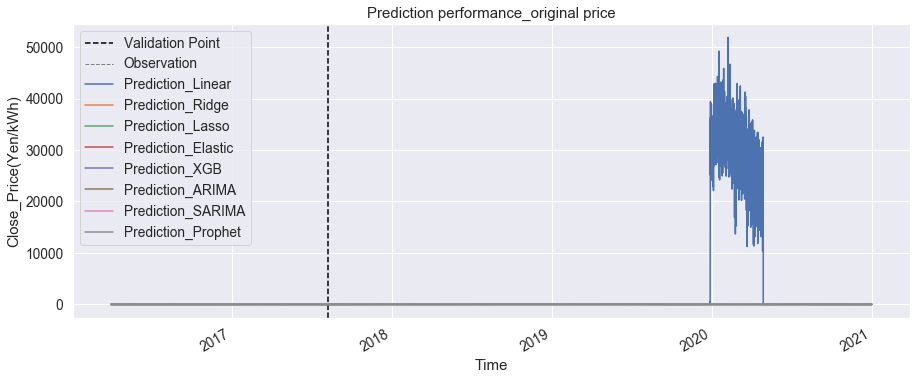

In [201]:
graph_data_original = graph_data_original.reset_index()

Models = [
            "Linear", "Ridge", "Lasso", "Elastic"
    , "XGB"
    ,"ARIMA"
    ,"SARIMA"
]

for model in Models:
    # inverse for Prediction
    y_pred_original = inverse_trans_yeo_johnson(all_data_lagged["Close"].values.reshape(-1,1), graph_data_log["Close_pred_" + model].values.reshape(-1, 1))
    y_pred_original =  pd.DataFrame(y_pred_original)
    # Add the data on "graph_data"
    graph_data_original["Close_pred_" + model] = y_pred_original
    
    # Validation setに対してYen/kWhでの評価
    rmse = sqrt(mean_squared_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:]))
    mae = mean_absolute_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:])
    # Store the result of evaluation into the "Eval_table"
    Eval_table_original[model] = pd.Series([np.mean(rmse), np.mean(mae)])

graph_data_original = graph_data_original.set_index("DateTime")

# Plot the original close price and  predicted price
fig, ax = plt.subplots(1, figsize=(15, 6))
# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Validation Point", linestyle="dashed", color="black")
# Plot Close
graph_data_original.Close[graph_data_original.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

# Plot the predicted price with each model
for model in Models:
    graph_data_original["Close_pred_" + model][graph_data_original.index > start].plot(ax=ax, label="Prediction_" + model)

# Plot Prophet
graph_data_original["Close_pred_Prophet"][graph_data_original.index > start].plot(ax=ax, label="Prediction_Prophet")
    
# x-axis
plt.title('Prediction performance_original price')
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Close_Price(Yen/kWh)")
plt.legend(loc="upper left");

In [202]:
# Evalation for the prediction of validation data based on log
Eval_table_log

,EvalFunc,Linear,Ridge,Lasso,XGB,ARIMA,SARIMA,Elestic,Elastic
0,RMSE_log,3.250536,0.905813,0.741566,0.937512,0.752286,0.966068,0.746196,0.746196
1,MAE_log,3.025085,0.678958,0.524682,0.701241,0.526909,0.744315,0.527434,0.527434


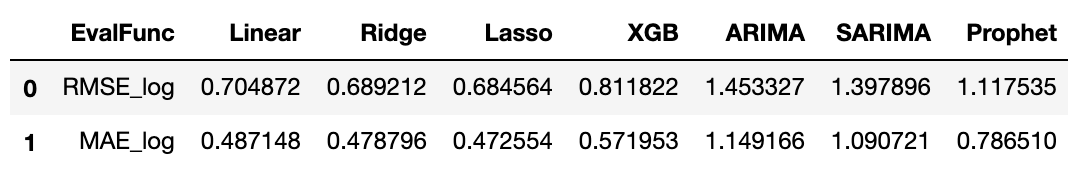

In [203]:
# Evalation for the prediction of validation data based on original
Eval_table_original = Eval_table_original[["EvalFunc", "Linear", "Ridge", "Lasso", "Elastic", "XGB", "ARIMA", "SARIMA", "Prophet"]]
Eval_table_original

,EvalFunc,Linear,Ridge,Lasso,Elastic,XGB,ARIMA,SARIMA,Prophet
0,RMSE_Yen/kWh,9434.874877,4.550292,3.942812,3.942812,4.634224,4.003233,4.834907,5.880753
1,MAE_Yen/kWh,2899.790192,2.522925,1.984035,1.984035,2.637343,1.994864,2.934096,4.153039


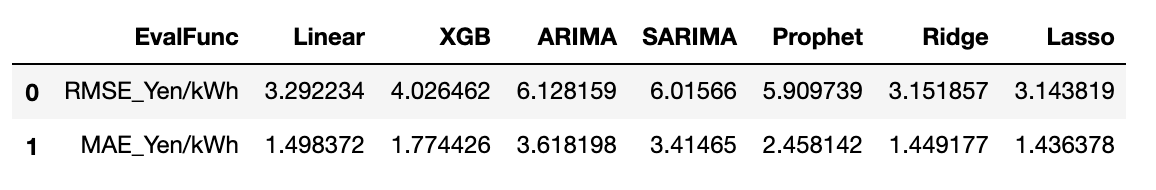

In [152]:
spot_1daylag = all_data["System_price(Yen/kWh)"].shift(1)[Min_valid_index:]
close = all_data["Close"][Min_valid_index:]

print("RMSE_Close/Spot: {}".format(round(sqrt(mean_squared_error(close, spot_1daylag)), 4)))
print("MAE_Close/Spot: {}".format(round(mean_absolute_error(close, spot_1daylag), 4)))

RMSE_Spot/Close: 3.1436
MAE_Spot/Close: 1.6334


In [38]:
close_1daylag = all_data["Close"].shift(1)[Min_valid_index:]
close = all_data["Close"][Min_valid_index:]

print("RMSE_Close/Closelag: {}".format(round(sqrt(mean_squared_error(close, close_1daylag)), 4)))
print("MAE_Close/Closelag: {}".format(round(mean_absolute_error(close, close_1daylag), 4)))

RMSE_Close/Closelag: 3.216
MAE_Close/Closelag: 1.4776


In [153]:
all_data["Close"][Min_valid_index:].describe()

count    59520.000000
mean         8.576486
std          5.116616
min          0.010000
25%          5.960000
50%          7.770000
75%          9.990000
max        150.000000
Name: Close, dtype: float64

Target
- Mean: 6.693
- Std; 5.888

※
[Explanable easily but conservative]
Linear model
ARIMA, ARIMAX, etc
Prophet



# Making combined price data with all the tradable price ※必要なデータセットをCSVデータへ変換

必要なのは、Spot price, 予測後のClose　price

In [160]:
#graph_data_original = graph_data_original.drop(["level_0", "index"], axis=1)

In [161]:
# Finalise dataset and make the csv data for trading phase

# Decide one model for trading
model = "Lasso"

df_prediction_trader = all_data[['Date', 'HH', 'Open', 'High', 'Low', 'Close', 'Price_Tokyo(Yen/kWh)']]
# Add 1 day lagged price of DA area price in Tokyo
df_prediction_trader["Price_Tokyo(Yen/kWh)_1daylag"] = all_data["Price_Tokyo(Yen/kWh)"].shift(48).fillna(0)
df_prediction_trader["DateTime"] = graph_data_original.reset_index()["DateTime"]
df_prediction_trader = df_prediction_trader.rename(columns={'Price_Tokyo(Yen/kWh)': 'Spot', 
                                                            'Price_Tokyo(Yen/kWh)_1daylag': 'Spot_1daylag'})
graph_data_original = graph_data_original.reset_index()
df_prediction_trader['Close_pred'] = graph_data_original["Close_pred_" + model].round(2)
df_prediction_trader = df_prediction_trader[df_prediction_trader.index >= Min_valid_index]

# CSV file
df_prediction_trader.to_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/df_prediction_trader.csv', index=False)

In [162]:
df_prediction_trader

,Date,HH,Open,High,Low,Close,Spot,Spot_1daylag,DateTime,Close_pred
23808,2017-08-10,1,10.70,12.98,5.94,9.40,8.19,8.10,2017-08-10 00:00:00,7.83
23809,2017-08-10,2,6.89,12.67,5.63,9.40,8.04,8.00,2017-08-10 00:30:00,7.58
23810,2017-08-10,3,6.42,11.86,5.58,9.40,7.93,8.05,2017-08-10 01:00:00,7.55
23811,2017-08-10,4,10.30,11.58,4.91,9.40,7.73,7.80,2017-08-10 01:30:00,7.27
23812,2017-08-10,5,10.50,11.62,4.88,9.40,7.93,7.94,2017-08-10 02:00:00,7.35
...,...,...,...,...,...,...,...,...,...,...
83323,2020-12-31,44,35.00,70.00,33.00,70.00,35.00,50.00,2020-12-31 21:30:00,18.81
83324,2020-12-31,45,42.00,70.00,41.01,45.48,40.00,40.00,2020-12-31 22:00:00,19.55
83325,2020-12-31,46,42.00,70.00,35.00,41.33,40.00,40.00,2020-12-31 22:30:00,17.98
83326,2020-12-31,47,37.00,70.00,33.93,36.66,35.00,33.21,2020-12-31 23:00:00,14.78
